In [114]:
#Feature Engineering for Data Analysis and Machine Learning part 1
#Auther Nawab khan 
import pandas as pd
import seaborn as sns
import numpy as np
import  matplotlib.pyplot  as plt
from sklearn.preprocessing import PolynomialFeatures

In [5]:
## Load in the Ames Housing Data

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Ames_Housing_Data.tsv", sep='\t')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [7]:
df = df.loc[df['Gr Liv Area'] <= 4000,:]
print("Number of rows in the data:", df.shape[0])
print("Number of columns in the data:", df.shape[1])
data = df.copy()

Number of rows in the data: 2925
Number of columns in the data: 82


In [8]:
df.shape

(2925, 82)

In [9]:
one_hot_encode_cols = df.dtypes[df.dtypes == object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

df[one_hot_encode_cols].head().T

0        1        2        3        4
MS Zoning            RL       RH       RL       RL       RL
Street             Pave     Pave     Pave     Pave     Pave
Alley               NaN      NaN      NaN      NaN      NaN
Lot Shape           IR1      Reg      IR1      Reg      IR1
Land Contour        Lvl      Lvl      Lvl      Lvl      Lvl
Utilities        AllPub   AllPub   AllPub   AllPub   AllPub
Lot Config       Corner   Inside   Corner   Corner   Inside
Land Slope          Gtl      Gtl      Gtl      Gtl      Gtl
Neighborhood      NAmes    NAmes    NAmes    NAmes  Gilbert
Condition 1        Norm    Feedr     Norm     Norm     Norm
Condition 2        Norm     Norm     Norm     Norm     Norm
Bldg Type          1Fam     1Fam     1Fam     1Fam     1Fam
House Style      1Story   1Story   1Story   1Story   2Story
Roof Style          Hip    Gable      Hip      Hip    Gable
Roof Matl       CompShg  CompShg  CompShg  CompShg  CompShg
Exterior 1st    BrkFace  VinylSd  Wd Sdng  BrkFace  VinylSd
Exterior 2nd    Plywood  VinylSd  Wd Sdng  BrkFace  VinylSd
Mas Vnr Type      Stone      NaN  BrkFace      NaN      NaN
Exter Qual           TA       TA       TA       Gd       TA
Exter Cond           TA       TA       TA       TA       TA
Foundation       CBlock   CBlock   CBlock   CBlock    PConc
Bsmt Qual            TA       TA       TA       TA       Gd
Bsmt Cond            Gd       TA       TA       TA       TA
Bsmt Exposure        Gd       No       No       No       No
BsmtFin Type 1      BLQ      Rec      ALQ      ALQ      GLQ
BsmtFin Type 2      Unf      LwQ      Unf      Unf      Unf
Heating            GasA     GasA     GasA     GasA     GasA
Heating QC           Fa       TA       TA       Ex       Gd
Central Air           Y        Y        Y        Y        Y
Electrical        SBrkr    SBrkr    SBrkr    SBrkr    SBrkr
Kitchen Qual         TA       TA       Gd       Ex       TA
Functional          Typ      Typ      Typ      Typ      Typ
Fireplace Qu         Gd      NaN      NaN       TA       TA
Garage Type      Attchd   Attchd   Attchd   Attchd   Attchd
Garage Finish       Fin      Unf      Unf      Fin      Fin
Garage Qual          TA       TA       TA       TA       TA
Garage Cond          TA       TA       TA       TA       TA
Paved Drive           P        Y        Y        Y        Y
Pool QC             NaN      NaN      NaN      NaN      NaN
Fence               NaN    MnPrv      NaN      NaN    MnPrv
Misc Feature        NaN      NaN     Gar2      NaN      NaN
Sale Type           WD       WD       WD       WD       WD 
Sale Condition   Normal   Normal   Normal   Normal   Normal

In [10]:
df = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)
df.describe().T

count          mean           std          min  \
Order            2925.0  1.464795e+03  8.464417e+02          1.0   
PID              2925.0  7.143931e+08  1.887274e+08  526301100.0   
MS SubClass      2925.0  5.739658e+01  4.266875e+01         20.0   
Lot Frontage     2435.0  6.902382e+01  2.271092e+01         21.0   
Lot Area         2925.0  1.010358e+04  7.781999e+03       1300.0   
Overall Qual     2925.0  6.088205e+00  1.402953e+00          1.0   
Overall Cond     2925.0  5.563761e+00  1.112262e+00          1.0   
Year Built       2925.0  1.971303e+03  3.024247e+01       1872.0   
Year Remod/Add   2925.0  1.984234e+03  2.086177e+01       1950.0   
Mas Vnr Area     2902.0  1.007105e+02  1.760343e+02          0.0   
BsmtFin SF 1     2924.0  4.380975e+02  4.380323e+02          0.0   
BsmtFin SF 2     2924.0  4.980746e+01  1.693006e+02          0.0   
Bsmt Unf SF      2924.0  5.589473e+02  4.396214e+02          0.0   
Total Bsmt SF    2924.0  1.046852e+03  4.211095e+02          0.0   
1st Flr SF       2925.0  1.155461e+03  3.765920e+02        334.0   
2nd Flr SF       2925.0  3.338328e+02  4.258420e+02          0.0   
Low Qual Fin SF  2925.0  4.684786e+00  4.634968e+01          0.0   
Gr Liv Area      2925.0  1.493979e+03  4.862736e+02        334.0   
Bsmt Full Bath   2923.0  4.303797e-01  5.240886e-01          0.0   
Bsmt Half Bath   2923.0  6.055423e-02  2.442227e-01          0.0   
Full Bath        2925.0  1.564786e+00  5.513858e-01          0.0   
Half Bath        2925.0  3.784615e-01  5.024029e-01          0.0   
Bedroom AbvGr    2925.0  2.853675e+00  8.277367e-01          0.0   
Kitchen AbvGr    2925.0  1.044444e+00  2.142513e-01          0.0   
TotRms AbvGrd    2925.0  6.434188e+00  1.557887e+00          2.0   
Fireplaces       2925.0  5.969231e-01  6.453486e-01          0.0   
Garage Yr Blt    2766.0  1.978088e+03  2.552887e+01       1895.0   
Garage Cars      2924.0  1.765048e+00  7.598341e-01          0.0   
Garage Area      2924.0  4.718837e+02  2.138160e+02          0.0   
Wood Deck SF     2925.0  9.339214e+01  1.260341e+02          0.0   
Open Porch SF    2925.0  4.716684e+01  6.657181e+01          0.0   
Enclosed Porch   2925.0  2.305094e+01  6.418681e+01          0.0   
3Ssn Porch       2925.0  2.596923e+00  2.516259e+01          0.0   
Screen Porch     2925.0  1.602940e+01  5.613140e+01          0.0   
Pool Area        2925.0  1.893333e+00  3.296427e+01          0.0   
Misc Val         2925.0  4.490974e+01  4.722380e+02          0.0   
Mo Sold          2925.0  6.216752e+00  2.711541e+00          1.0   
Yr Sold          2925.0  2.007791e+03  1.317408e+00       2006.0   
SalePrice        2925.0  1.804116e+05  7.855486e+04      12789.0   

                          25%          50%           75%           max  
Order            7.320000e+02       1463.0  2.199000e+03  2.930000e+03  
PID              5.284770e+08  535453210.0  9.071801e+08  1.007100e+09  
MS SubClass      2.000000e+01         50.0  7.000000e+01  1.900000e+02  
Lot Frontage     5.800000e+01         68.0  8.000000e+01  3.130000e+02  
Lot Area         7.438000e+03       9428.0  1.151500e+04  2.152450e+05  
Overall Qual     5.000000e+00          6.0  7.000000e+00  1.000000e+01  
Overall Cond     5.000000e+00          5.0  6.000000e+00  9.000000e+00  
Year Built       1.954000e+03       1973.0  2.001000e+03  2.010000e+03  
Year Remod/Add   1.965000e+03       1993.0  2.004000e+03  2.010000e+03  
Mas Vnr Area     0.000000e+00          0.0  1.640000e+02  1.600000e+03  
BsmtFin SF 1     0.000000e+00        369.5  7.332500e+02  2.288000e+03  
BsmtFin SF 2     0.000000e+00          0.0  0.000000e+00  1.526000e+03  
Bsmt Unf SF      2.187500e+02        464.5  8.010000e+02  2.336000e+03  
Total Bsmt SF    7.927500e+02        989.5  1.299250e+03  3.206000e+03  
1st Flr SF       8.760000e+02       1082.0  1.383000e+03  3.820000e+03  
2nd Flr SF       0.000000e+00          0.0  7.020000e+02  1.862000e+03  
Low Qual Fin SF  0.000000e+00          0.0  0.000000e+00

C:\Users\PMLS\AppData\Local\Temp\ipykernel_111572\4143324588.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SalePrice"])


<Axes: xlabel='SalePrice', ylabel='Density'>

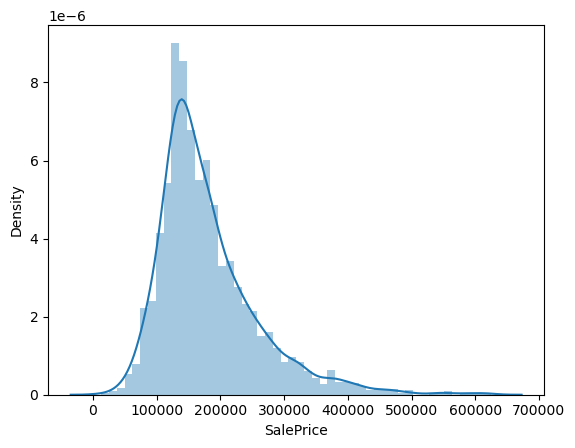

In [11]:
sns.distplot(df["SalePrice"])

(array([[2925.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,  623.,  799.],
        [2925.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [2925.,    0.,    0., ...,    0.,    0.,    0.],
        [2925.,    0.,    0., ...,    0.,    0.,    0.],
        [2925.,    0.,    0., ...,    0.,    0.,    0.]]),
 array([0.00000000e+00, 1.00710011e+08, 2.01420022e+08, 3.02130033e+08,
        4.02840044e+08, 5.03550055e+08, 6.04260066e+08, 7.04970077e+08,
        8.05680088e+08, 9.06390099e+08, 1.00710011e+09]),
 <a list of 261 BarContainer objects>)

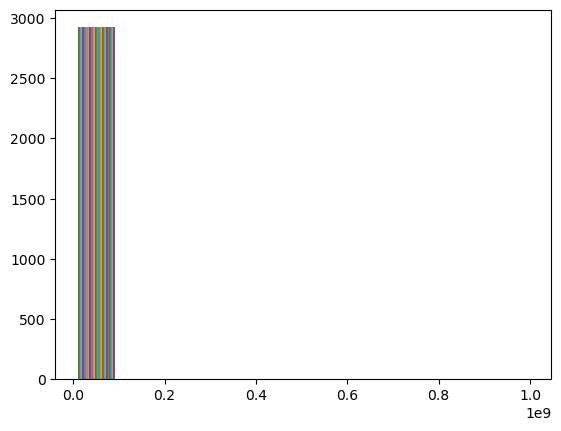

In [12]:
plt.hist(df)

Lot Frontage      1.111071
Mas Vnr Area      2.565458
BsmtFin SF 1      0.821985
BsmtFin SF 2      4.135900
Bsmt Unf SF       0.925021
Total Bsmt SF     0.399079
Bsmt Full Bath    0.615553
Bsmt Half Bath    3.965970
Garage Yr Blt    -0.382039
Garage Cars      -0.219734
Garage Area       0.213681
dtype: float64


C:\Users\PMLS\AppData\Local\Temp\ipykernel_111572\3093819805.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(skew_vals["BsmtFin SF 2"])
C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: ylabel='Density'>

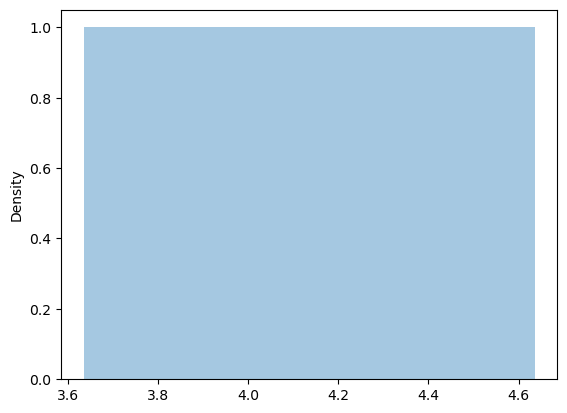

In [13]:
# Create a list of float colums to check for skewing
mask = data.dtypes == np.float_
float_cols = data.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = data[float_cols].skew()
print(skew_vals)
sns.distplot(skew_vals["BsmtFin SF 2"])

In [14]:
df['BsmtFin SF 2'].describe()

count    2924.000000
mean       49.807456
std       169.300590
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFin SF 2, dtype: float64

C:\Users\PMLS\AppData\Local\Temp\ipykernel_111572\2536054934.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Garage Area'])


<Axes: xlabel='Garage Area', ylabel='Density'>

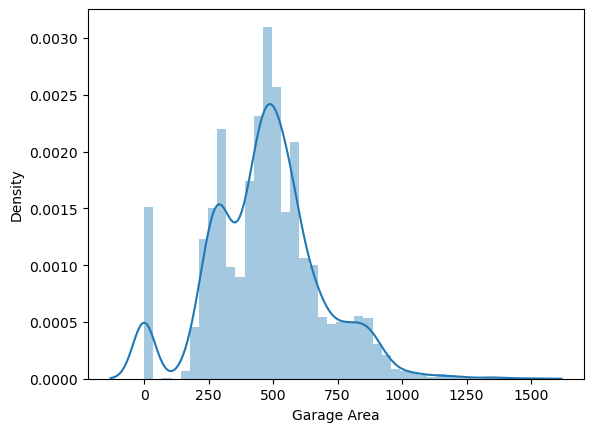

In [15]:
sns.distplot(df['Garage Area'])

In [16]:
# Create a list of float colums to check for skewing
mask = data.dtypes == np.int64
float_cols = data.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
negtive_skewed_range = 0.3
skew_vals = data[float_cols].skew()
print(skew_vals)

Order               0.002058
PID                 0.056667
MS SubClass         1.356549
Lot Area           13.200004
Overall Qual        0.171657
Overall Cond        0.572769
Year Built         -0.602475
Year Remod/Add     -0.449567
1st Flr SF          0.942615
2nd Flr SF          0.847517
Low Qual Fin SF    12.107629
Gr Liv Area         0.878879
Full Bath           0.164954
Half Bath           0.702966
Bedroom AbvGr       0.306912
Kitchen AbvGr       4.309573
TotRms AbvGrd       0.704992
Fireplaces          0.732312
Wood Deck SF        1.848286
Open Porch SF       2.495162
Enclosed Porch      4.010586
3Ssn Porch         11.393854
Screen Porch        3.953495
Pool Area          18.743766
Misc Val           22.225015
Mo Sold             0.195773
Yr Sold             0.132843
SalePrice           1.591072
dtype: float64


In [17]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

Skew
Misc Val         22.225015
Pool Area        18.743766
Lot Area         13.200004
Low Qual Fin SF  12.107629
3Ssn Porch       11.393854
Kitchen AbvGr     4.309573
Enclosed Porch    4.010586
Screen Porch      3.953495
Open Porch SF     2.495162
Wood Deck SF      1.848286
SalePrice         1.591072
MS SubClass       1.356549
1st Flr SF        0.942615
Gr Liv Area       0.878879
2nd Flr SF        0.847517

In [18]:
negtive_skewed_range = 0.3
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(negtive_skewed_range))
            )

skew_cols


Skew
Misc Val         22.225015
Pool Area        18.743766
Lot Area         13.200004
Low Qual Fin SF  12.107629
3Ssn Porch       11.393854
Kitchen AbvGr     4.309573
Enclosed Porch    4.010586
Screen Porch      3.953495
Open Porch SF     2.495162
Wood Deck SF      1.848286
SalePrice         1.591072
MS SubClass       1.356549
1st Flr SF        0.942615
Gr Liv Area       0.878879
2nd Flr SF        0.847517
Fireplaces        0.732312
TotRms AbvGrd     0.704992
Half Bath         0.702966
Overall Cond      0.572769
Bedroom AbvGr     0.306912
Year Remod/Add   -0.449567
Year Built       -0.602475

C:\Users\PMLS\AppData\Local\Temp\ipykernel_111572\3933102842.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["BsmtFin SF 1"])


<Axes: xlabel='BsmtFin SF 1', ylabel='Density'>

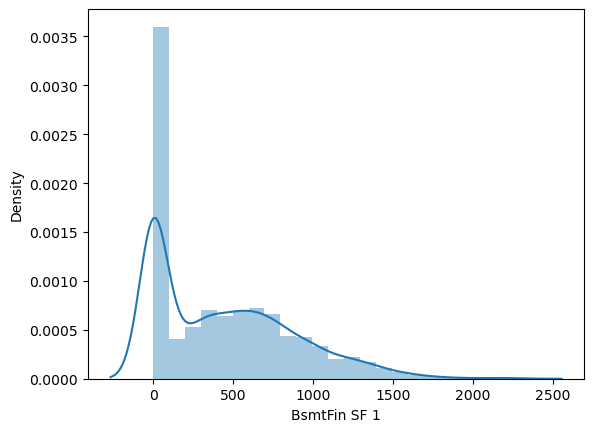

In [19]:
sns.distplot(df["BsmtFin SF 1"])

C:\Users\PMLS\AppData\Local\Temp\ipykernel_111572\2188988450.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(after_log)


<Axes: xlabel='BsmtFin SF 1', ylabel='Density'>

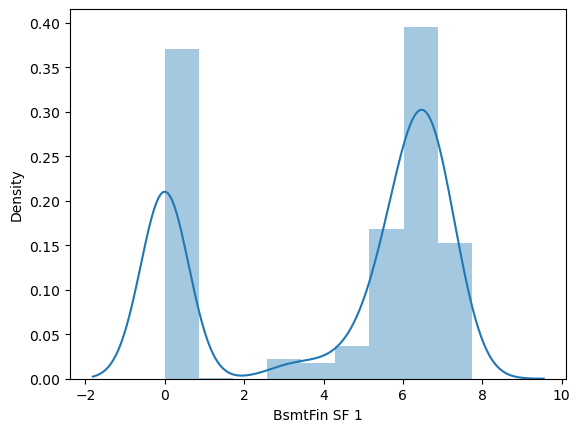

In [20]:
field = "BsmtFin SF 1"
after_log = df[field].apply(np.log1p)
sns.distplot(after_log)


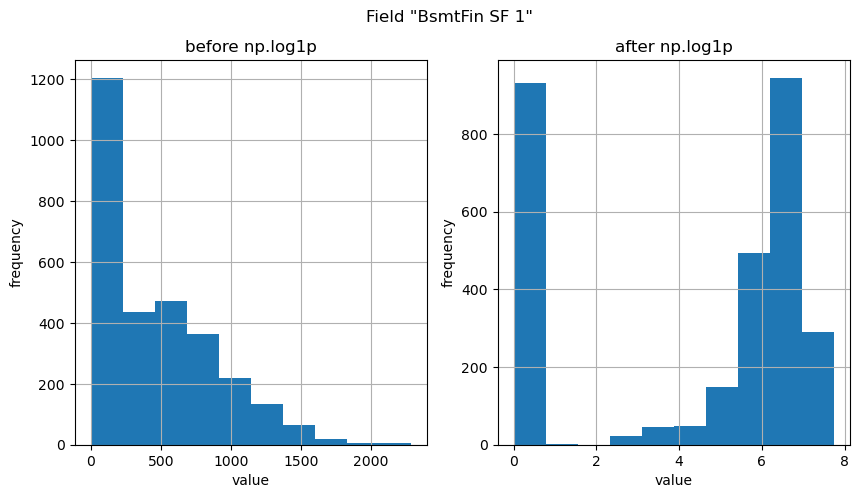

In [21]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "BsmtFin SF 1"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

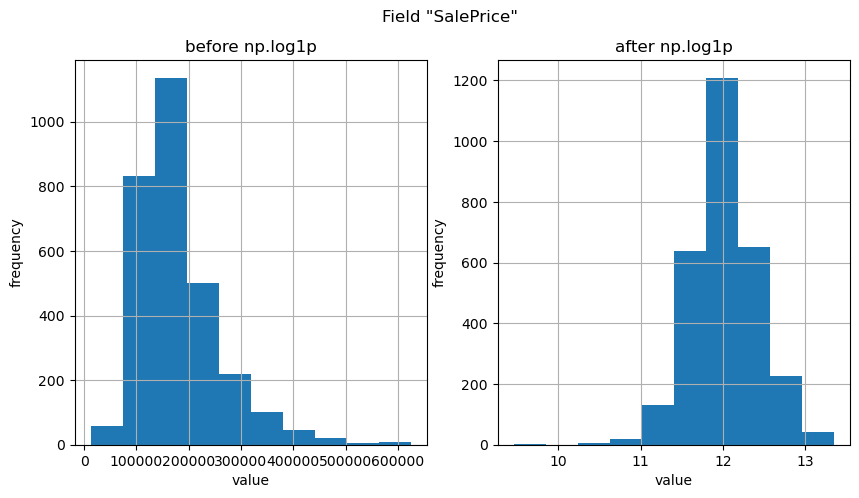

In [22]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "SalePrice"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));


C:\Users\PMLS\AppData\Local\Temp\ipykernel_111572\4143324588.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SalePrice"])


<Axes: xlabel='SalePrice', ylabel='Density'>

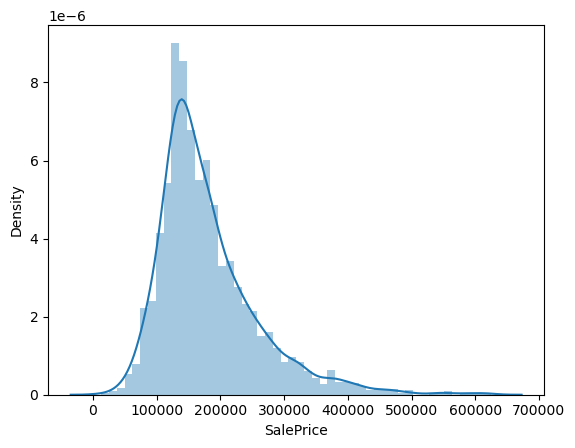

In [23]:
sns.distplot(df["SalePrice"])

In [24]:
df = data
data.isnull().sum().sort_values()

Order                0
Sale Condition       0
Heating QC           0
Central Air          0
1st Flr SF           0
                  ... 
Mas Vnr Type      1774
Fence             2354
Alley             2727
Misc Feature      2820
Pool QC           2914
Length: 82, dtype: int64

In [25]:
smaller_df = df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars','SalePrice']]

In [26]:
smaller_df.describe().T

count           mean           std      min       25%  \
Lot Area        2925.0   10103.583590   7781.999124   1300.0    7438.0   
Overall Qual    2925.0       6.088205      1.402953      1.0       5.0   
Overall Cond    2925.0       5.563761      1.112262      1.0       5.0   
Year Built      2925.0    1971.302906     30.242474   1872.0    1954.0   
Year Remod/Add  2925.0    1984.234188     20.861774   1950.0    1965.0   
Gr Liv Area     2925.0    1493.978803    486.273646    334.0    1126.0   
Full Bath       2925.0       1.564786      0.551386      0.0       1.0   
Bedroom AbvGr   2925.0       2.853675      0.827737      0.0       2.0   
Fireplaces      2925.0       0.596923      0.645349      0.0       0.0   
Garage Cars     2924.0       1.765048      0.759834      0.0       1.0   
SalePrice       2925.0  180411.574701  78554.857286  12789.0  129500.0   

                     50%       75%       max  
Lot Area          9428.0   11515.0  215245.0  
Overall Qual         6.0       7.0      10.0  
Overall Cond         5.0       6.0       9.0  
Year Built        1973.0    2001.0    2010.0  
Year Remod/Add    1993.0    2004.0    2010.0  
Gr Liv Area       1441.0    1740.0    3820.0  
Full Bath            2.0       2.0       4.0  
Bedroom AbvGr        3.0       3.0       8.0  
Fireplaces           1.0       1.0       4.0  
Garage Cars          2.0       2.0       5.0  
SalePrice       160000.0  213500.0  625000.0

In [27]:
smaller_df.info()
smaller_df['Garage Cars'].isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2924 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 274.2 KB


1

In [28]:
smaller_df = smaller_df.fillna(0)

In [29]:
smaller_df['Garage Cars'].isna().sum()

0

In [30]:
X = smaller_df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars']]

y = smaller_df['SalePrice']

In [31]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 251.4 KB
<class 'pandas.core.series.Series'>
Index: 2925 entries, 0 to 2929
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
2925 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB


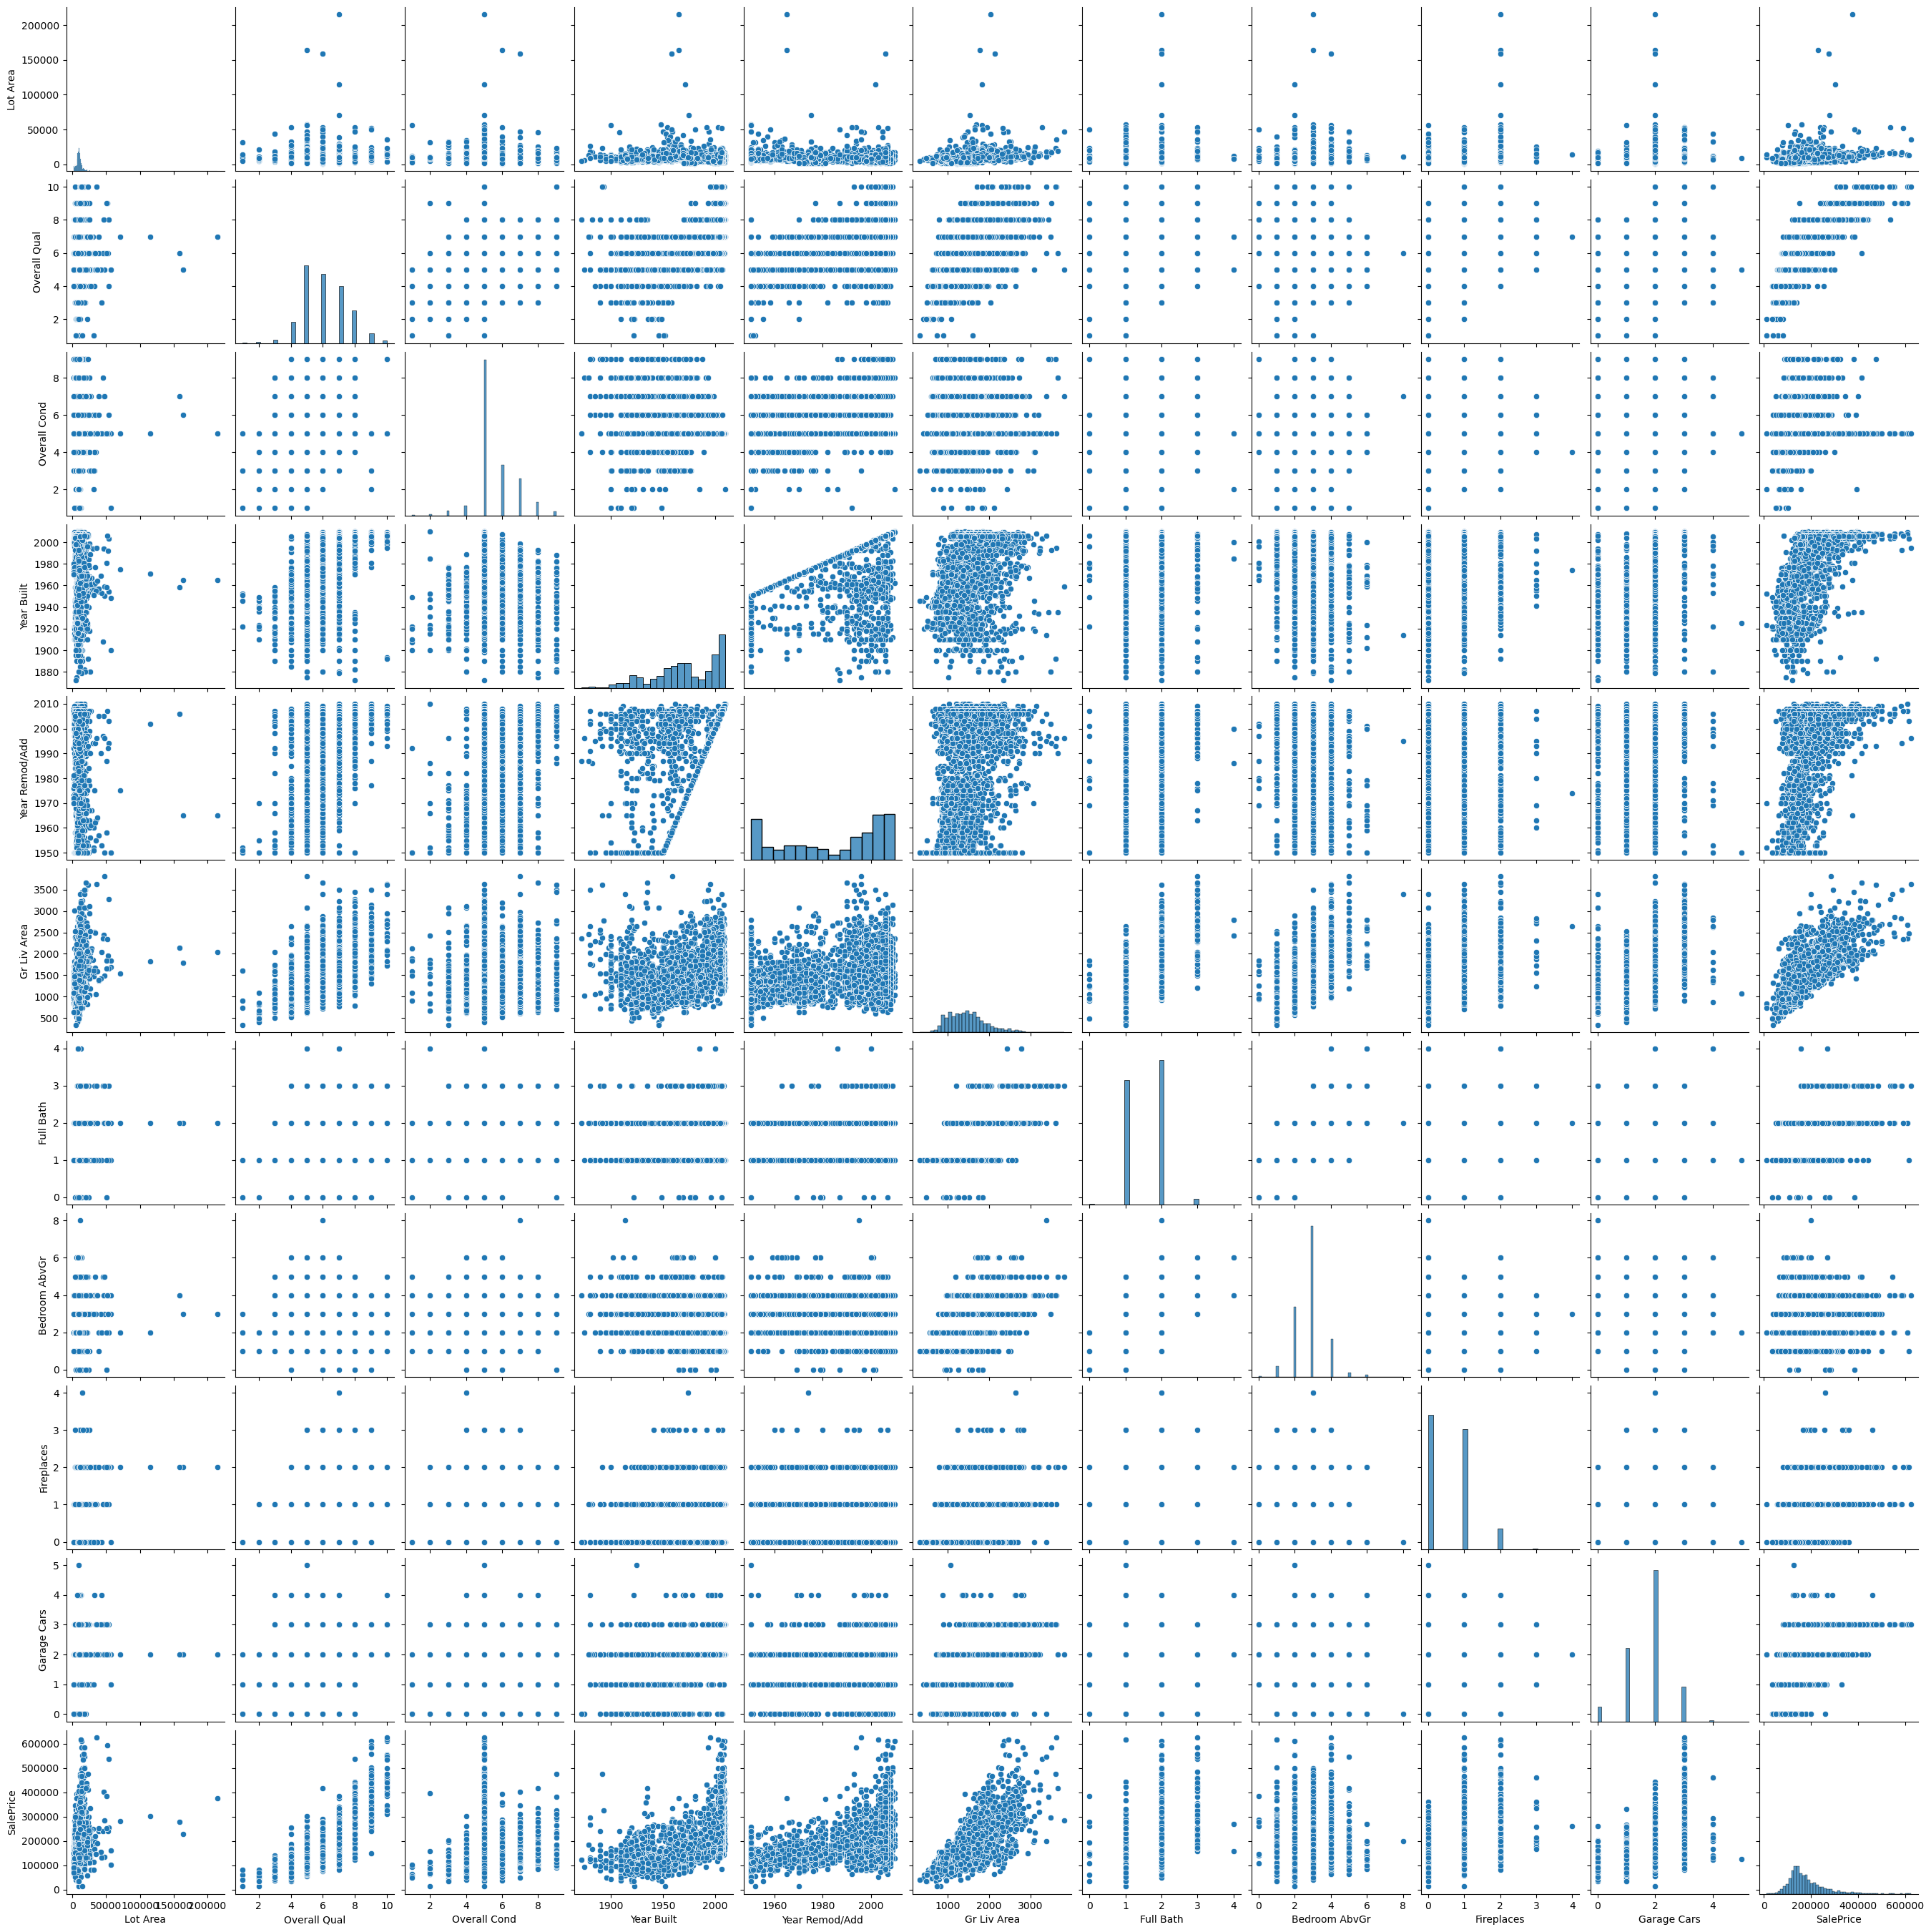

In [32]:
sns.pairplot(smaller_df)

In [33]:
X2 = X.copy()

X2['OQ2'] = X2['Overall Qual'] ** 2
X2['GLA2'] = X2['Gr Liv Area'] ** 2

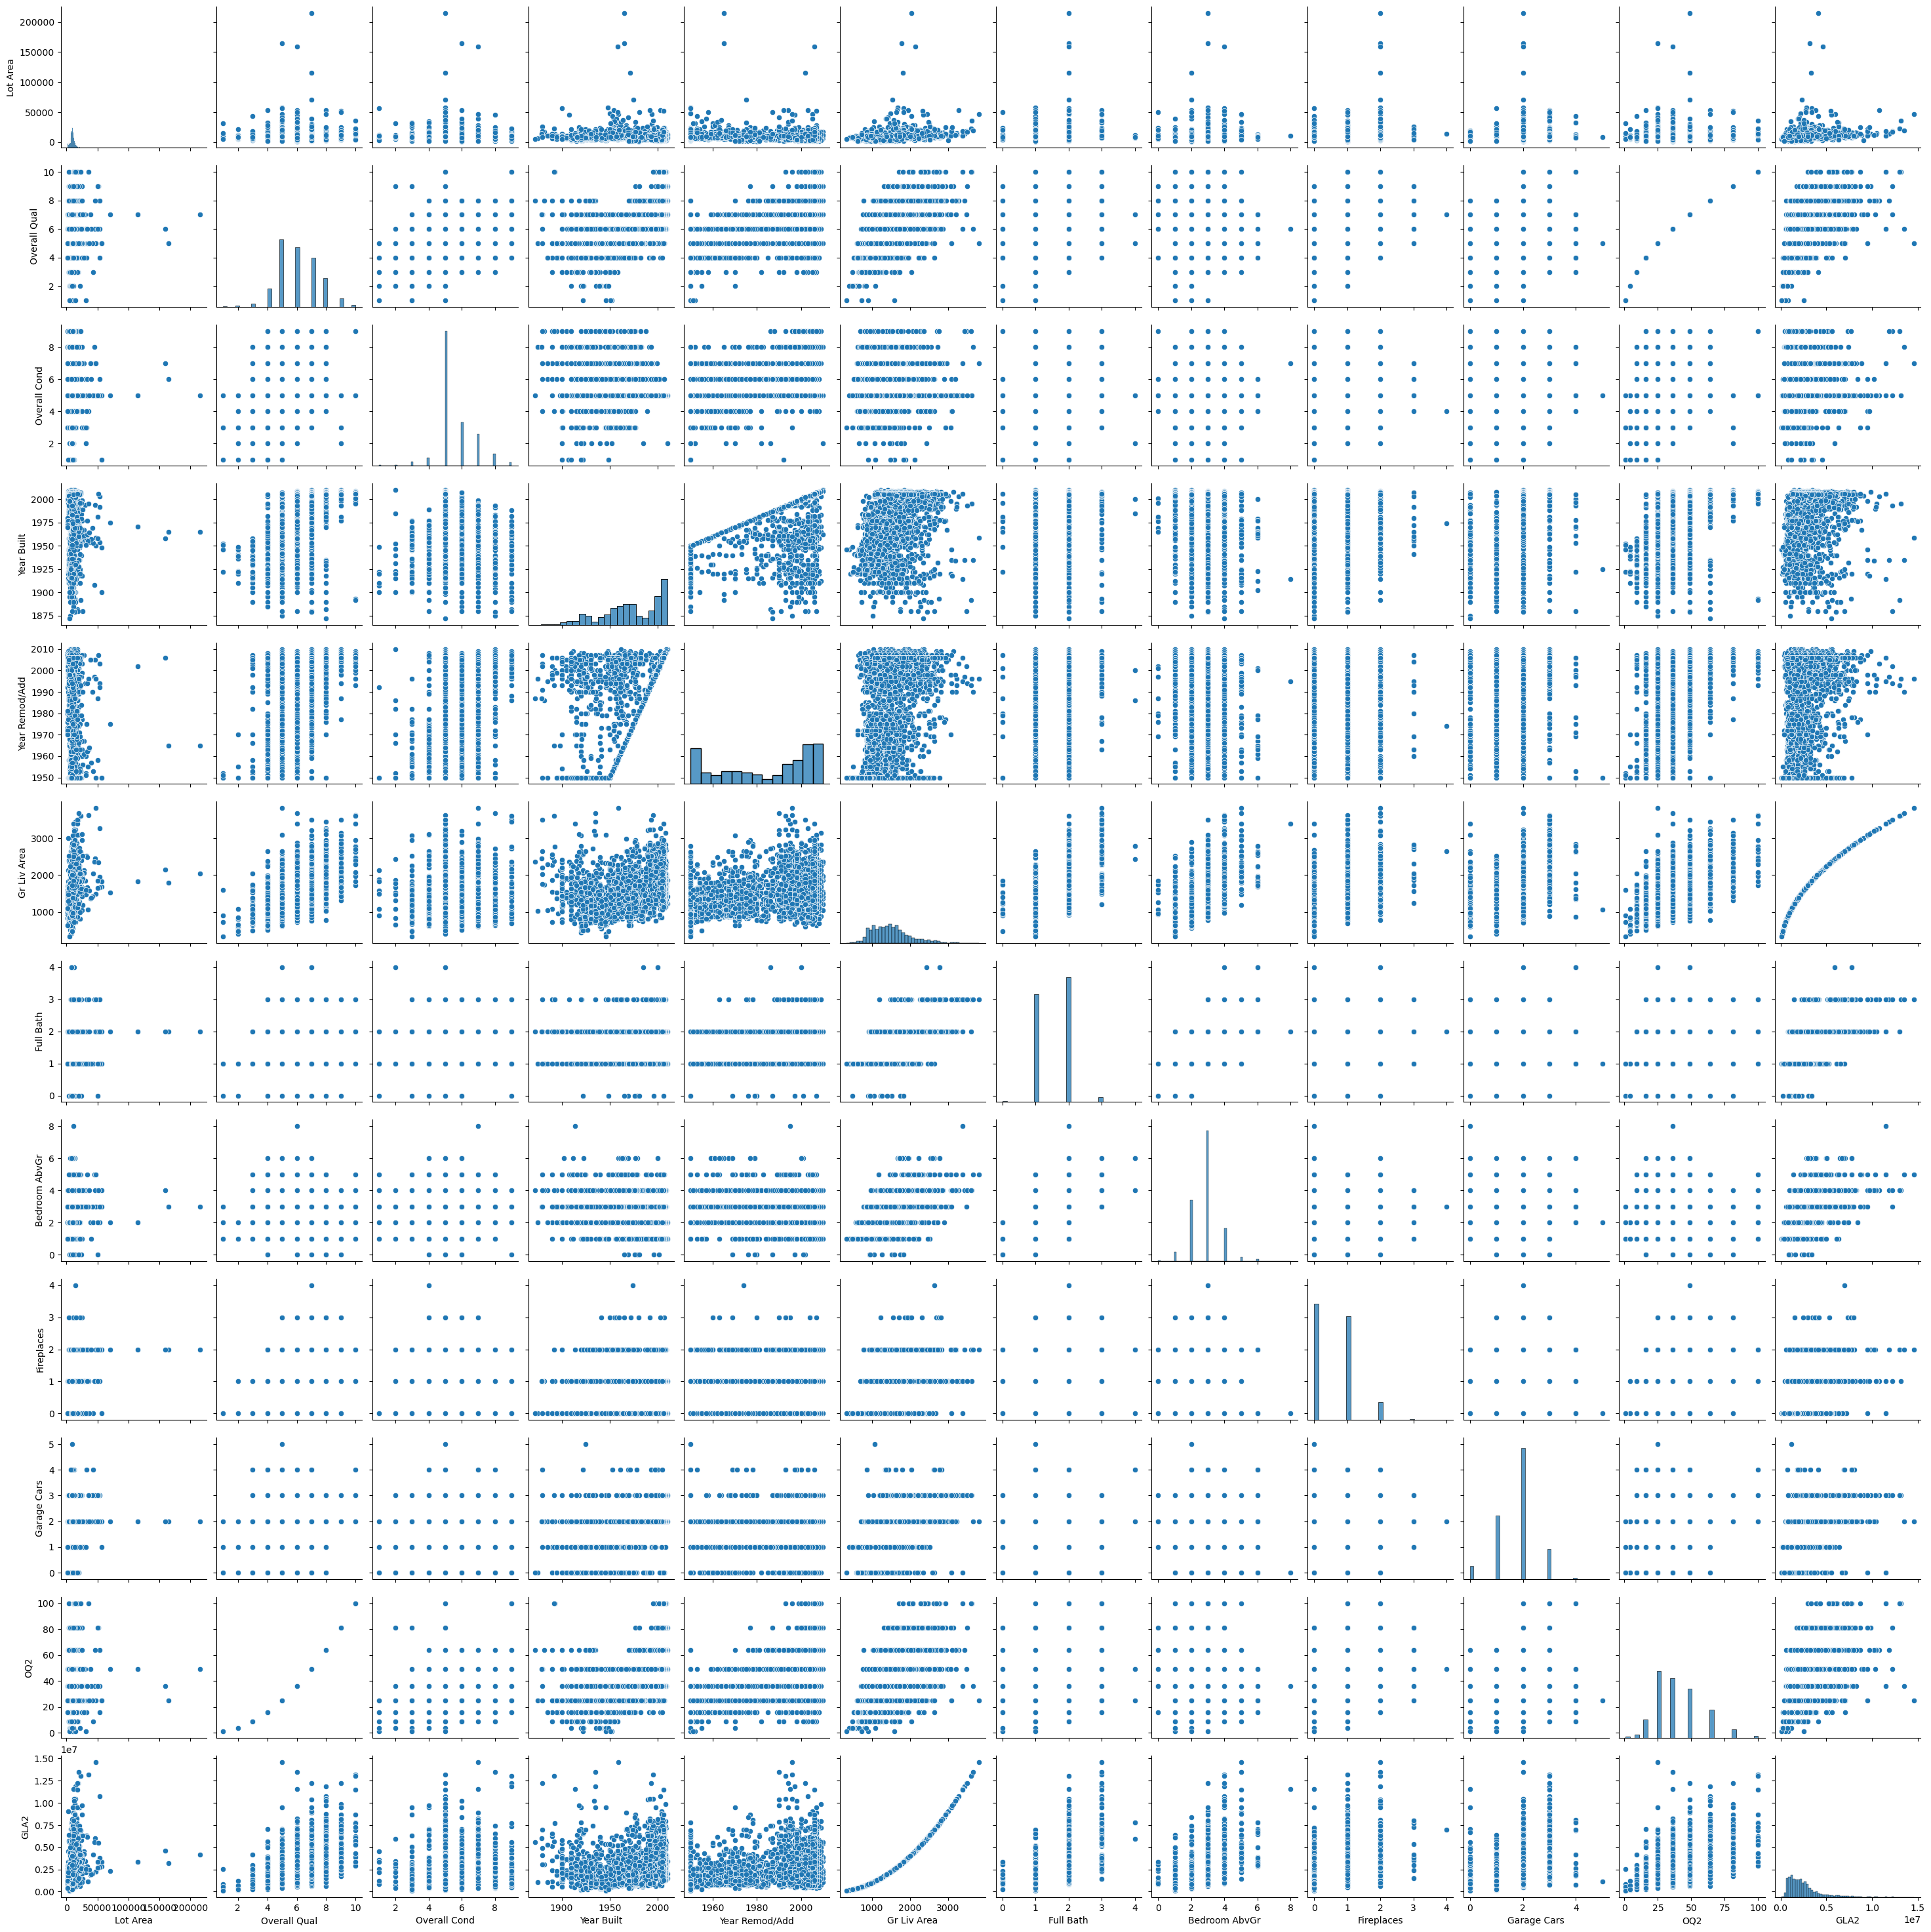

In [34]:
sns.pairplot(X2)

In [35]:
X3 = X2.copy()

# multiplicative interaction
X3['OQ_x_YB'] = X3['Overall Qual'] * X3['Year Built']

# division interaction
X3['OQ_/_LA'] = X3['Overall Qual'] / X3['Lot Area']

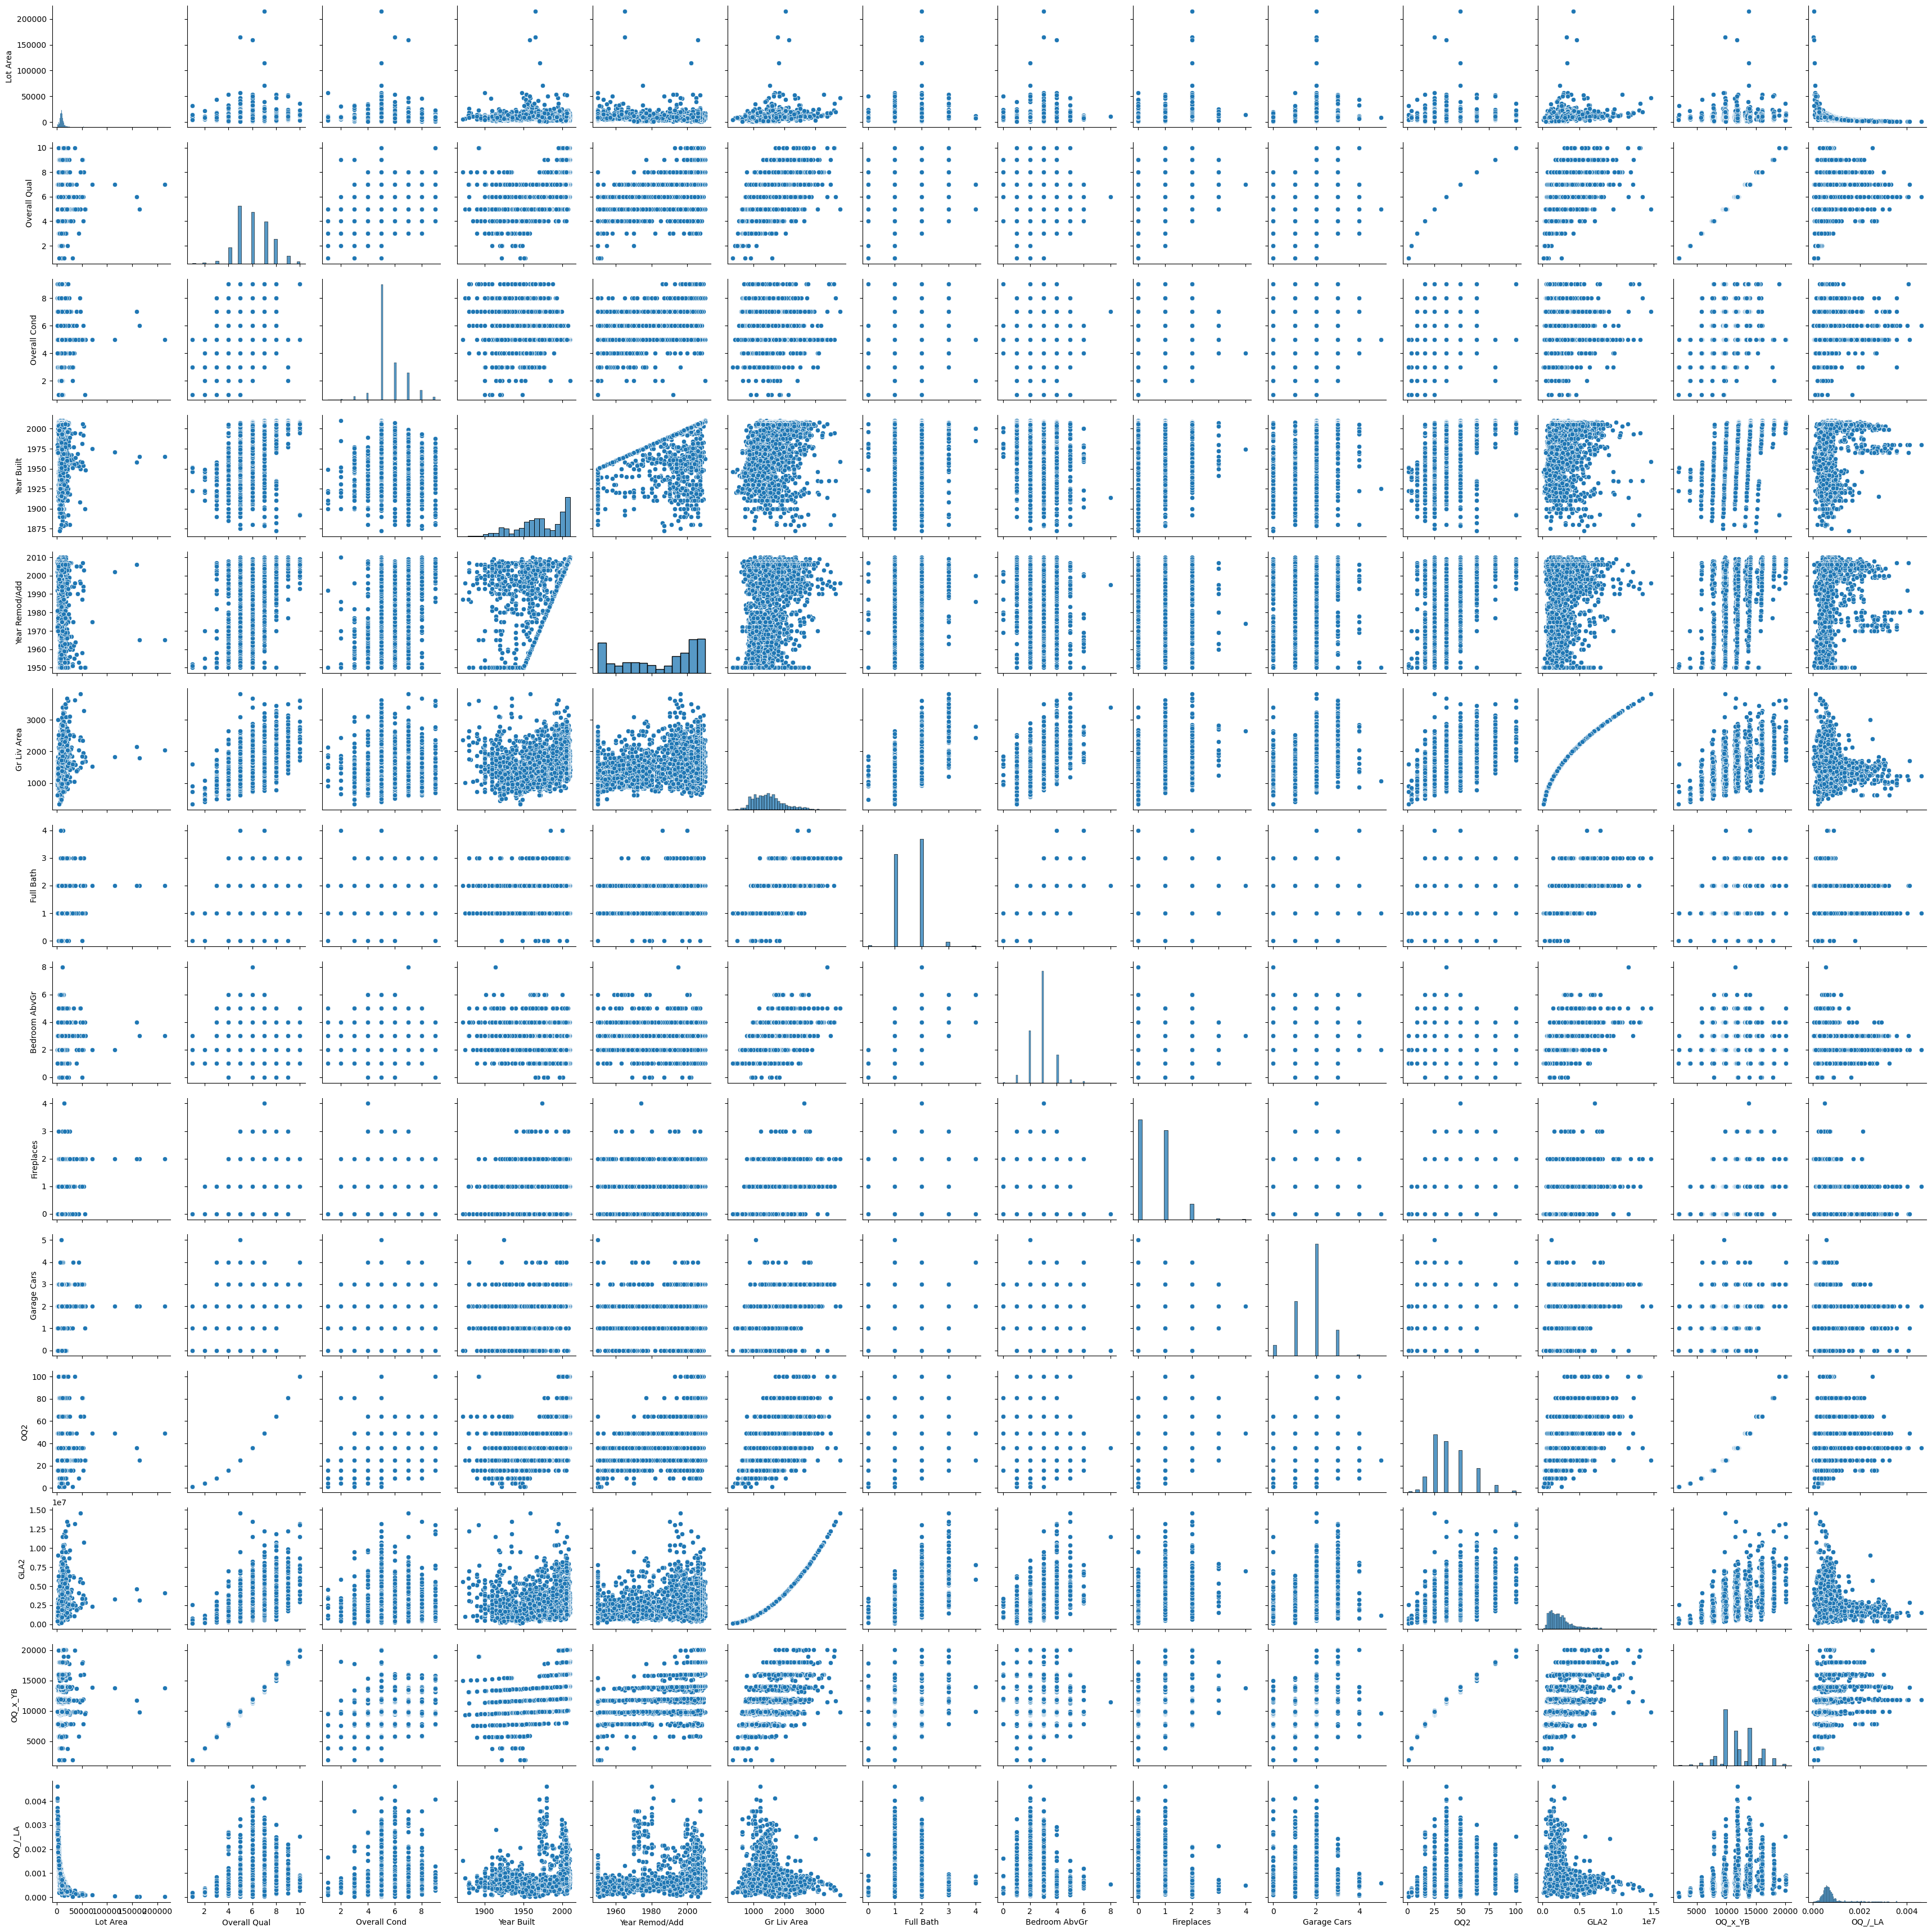

In [36]:
sns.pairplot(X3)

In [80]:
pd["house Style"].values_counts()

TypeError: 'module' object is not subscriptable

In [82]:
data['House Style'].value_counts()

House Style
1Story    1480
2Story     869
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: count, dtype: int64

In [98]:
pd.get_dummies(df['House Style'], drop_first=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2925 non-null   int64  
 1   PID              2925 non-null   int64  
 2   MS SubClass      2925 non-null   int64  
 3   MS Zoning        2925 non-null   object 
 4   Lot Frontage     2435 non-null   float64
 5   Lot Area         2925 non-null   int64  
 6   Street           2925 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2925 non-null   object 
 9   Land Contour     2925 non-null   object 
 10  Utilities        2925 non-null   object 
 11  Lot Config       2925 non-null   object 
 12  Land Slope       2925 non-null   object 
 13  Neighborhood     2925 non-null   object 
 14  Condition 1      2925 non-null   object 
 15  Condition 2      2925 non-null   object 
 16  Bldg Type        2925 non-null   object 
 17  House Style      29

In [88]:
data.head().T

0          1          2          3          4
Order                   1          2          3          4          5
PID             526301100  526350040  526351010  526353030  527105010
MS SubClass            20         20         20         20         60
MS Zoning              RL         RH         RL         RL         RL
Lot Frontage        141.0       80.0       81.0       93.0       74.0
...                   ...        ...        ...        ...        ...
Mo Sold                 5          6          6          4          3
Yr Sold              2010       2010       2010       2010       2010
Sale Type             WD         WD         WD         WD         WD 
Sale Condition     Normal     Normal     Normal     Normal     Normal
SalePrice          215000     105000     172000     244000     189900

[82 rows x 5 columns]

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2925 non-null   int64  
 1   PID              2925 non-null   int64  
 2   MS SubClass      2925 non-null   int64  
 3   MS Zoning        2925 non-null   object 
 4   Lot Frontage     2435 non-null   float64
 5   Lot Area         2925 non-null   int64  
 6   Street           2925 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2925 non-null   object 
 9   Land Contour     2925 non-null   object 
 10  Utilities        2925 non-null   object 
 11  Lot Config       2925 non-null   object 
 12  Land Slope       2925 non-null   object 
 13  Neighborhood     2925 non-null   object 
 14  Condition 1      2925 non-null   object 
 15  Condition 2      2925 non-null   object 
 16  Bldg Type        2925 non-null   object 
 17  House Style      29

In [106]:
mask = data.dtypes == np.object_
float_cols = data.columns[mask]
print(float_cols)

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')


In [110]:
pd.get_dummies(data)

Order        PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0         1  526301100           20         141.0     31770             6   
1         2  526350040           20          80.0     11622             5   
2         3  526351010           20          81.0     14267             6   
3         4  526353030           20          93.0     11160             7   
4         5  527105010           60          74.0     13830             5   
...     ...        ...          ...           ...       ...           ...   
2925   2926  923275080           80          37.0      7937             6   
2926   2927  923276100           20           NaN      8885             5   
2927   2928  923400125           85          62.0     10441             5   
2928   2929  924100070           20          77.0     10010             5   
2929   2930  924151050           60          74.0      9627             7   

      Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  ...  \
0                5        1960            1960         112.0  ...   
1                6        1961            1961           0.0  ...   
2                6        1958            1958         108.0  ...   
3                5        1968            1968           0.0  ...   
4                5        1997            1998           0.0  ...   
...            ...         ...             ...           ...  ...   
2925             6        1984            1984           0.0  ...   
2926             5        1983            1983           0.0  ...   
2927             5        1992            1992           0.0  ...   
2928             5        1974            1975           0.0  ...   
2929             5        1993            1994          94.0  ...   

      Sale Type_New  Sale Type_Oth  Sale Type_VWD  Sale Type_WD   \
0             False          False          False           True   
1             False          False          False           True   
2             False          False          False           True   
3             False          False          False           True   
4             False          False          False           True   
...             ...            ...            ...            ...   
2925          False          False          False           True   
2926          False          False          False           True   
2927          False          False          False           True   
2928          False          False          False           True   
2929          False          False          False           True   

      Sale Condition_Abnorml  Sale Condition_AdjLand  Sale Condition_Alloca  \
0                      False                   False                  False   
1                      False                   False                  False   
2                      False                   False                  False   
3                      False                   False                  False   
4                      False                   False                  False   
...                      ...                     ...                    ...   
2925                   False                   False                  False   
2926                   False                   False                  False   
2927                   False                   False                  False   
2928                   False                   False                  False   
2929                   False                   False                  False   

      Sale Condition_Family  Sale Condition_Normal  Sale Condition_Partial  
0                     False                   True                   False  
1                     False                   True                   False  
2                     False                   True                   False  
3                     False                   True                   False  
4                     False                   True                   False  
...                     

In [112]:
nbh_counts = df.Neighborhood.value_counts()
nbh_counts

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64

In [118]:
pf = PolynomialFeatures(degree=2)

In [126]:
features = ['Lot Area', 'Overall Qual']
pf.fit(df[features])
pf.get_feature_names_out()

array(['1', 'Lot Area', 'Overall Qual', 'Lot Area^2',
       'Lot Area Overall Qual', 'Overall Qual^2'], dtype=object)

AttributeError: 'PolynomialFeatures' object has no attribute 'get_feature_names'

In [144]:
feat_array = pf.transform(df[features])
result = pd.DataFrame(feat_array, columns = pf.get_feature_names_out(input_features=features))
#sns.pairplot(result)
pd.DataFrame(feat_array, columns = pf.get_feature_names_out(input_features=features))


1  Lot Area  Overall Qual    Lot Area^2  Lot Area Overall Qual  \
0     1.0   31770.0           6.0  1.009333e+09               190620.0   
1     1.0   11622.0           5.0  1.350709e+08                58110.0   
2     1.0   14267.0           6.0  2.035473e+08                85602.0   
3     1.0   11160.0           7.0  1.245456e+08                78120.0   
4     1.0   13830.0           5.0  1.912689e+08                69150.0   
...   ...       ...           ...           ...                    ...   
2920  1.0    7937.0           6.0  6.299597e+07                47622.0   
2921  1.0    8885.0           5.0  7.894322e+07                44425.0   
2922  1.0   10441.0           5.0  1.090145e+08                52205.0   
2923  1.0   10010.0           5.0  1.002001e+08                50050.0   
2924  1.0    9627.0           7.0  9.267913e+07                67389.0   

      Overall Qual^2  
0               36.0  
1               25.0  
2               36.0  
3               49.0  
4               25.0  
...              ...  
2920            36.0  
2921            25.0  
2922            25.0  
2923            25.0  
2924            49.0  

[2925 rows x 6 columns]

In [160]:
cubic = PolynomialFeatures(degree=4)

In [162]:
data_list =  ['Lot Area', 'Overall Qual']
cubic.fit(df[data_list])
pf.get_feature_names_out()

array(['1', 'Lot Area', 'Overall Qual', 'Lot Area^2',
       'Lot Area Overall Qual', 'Overall Qual^2'], dtype=object)